In [22]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [23]:
ci = pd.read_csv("cutpoint_values - bootstrap.csv", index_col=0)
cutoff = pd.read_csv("cutpoint_values - thresholds.csv", index_col=0)
percentage = pd.read_csv("cutpoint_values - percentage.tsv", index_col=0, delimiter='\t')

In [24]:
percentage.replace({' %':''}, regex=True, inplace=True)

In [25]:
within = pd.DataFrame(index=cutoff.index, columns=cutoff.columns)

In [26]:
within.replace({np.nan: 0}, inplace=True)

In [33]:
ci.replace({np.nan: '-'}, inplace=True)
cutoff.replace({np.nan: '-'}, inplace=True)

In [35]:
thresh_all = 0
thresh_within = 0
for i in cutoff.index:
    for col in cutoff.columns:
        if cutoff.loc[i, col] != '-':
            thresh_all+=1
#             print(cutoff.loc[i, col])
            val = float(cutoff.loc[i, col])
            low, up = float(ci.loc[i, col].split(" ")[1].strip("[").strip(',')), float(ci.loc[i, col].split(", ")[1].strip("]"))
        
            if low<=val and val<=up:
                within.loc[i, col] = 1
                thresh_within+=1

In [36]:
print(f"From {thresh_all} only {thresh_within} values were withing the CIs")

From 153 only 42 values were withing the CIs


<AxesSubplot: ylabel='Cohort'>

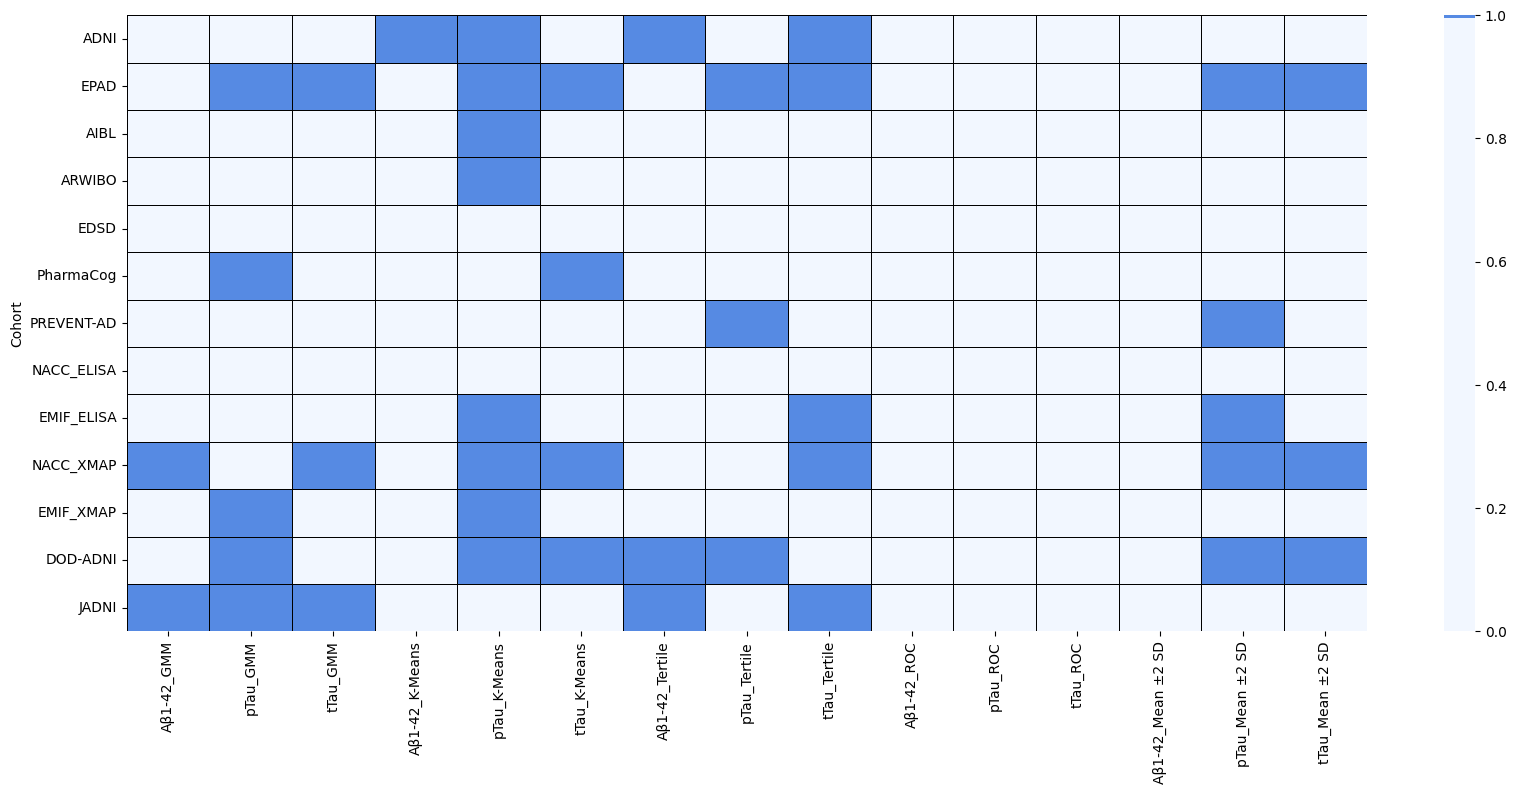

In [37]:
plt.figure(figsize=(20, 8))
sns.heatmap(within.astype(float), cmap=['#f2f7ff','#568ae3'], center=1, linewidths=0.5, linecolor='black')

In [36]:
# for i in percentage.index:
#     for col in percentage.columns:
#         if percentage.loc[i, col]!= '-' and float(percentage.loc[i, col])>1:
#             print(i, col)
        

In [40]:
a = list()
t = list()
n = list()
for i in percentage.columns:
    if 'Aβ1-42' in i:
        a.append(i)
    elif 'tTau'in i:
        t.append(i)
    else:
        n.append(i)

In [52]:
percentage[n]

,pTau_GMM,pTau_K-Means,pTau_Tertile,pTau_ROC,pTau_Mean ±2 SD
Cohort,,,,,
ADNI,0.64,0.25,0.5,0.85,0.53
EPAD,0.33,0.22,0.28,3.02,0.43
AIBL,2.39,1.81,-,-,-
ARWIBO,8.85,0.72,-,-,-
EDSD,2.59,1.61,-,-,-
PREVENT-AD,2.46,0.9,0.52,-,0.87
PharmaCog,0.61,1.71,-,-,-
NACC_ELISA,1.99,0.69,0.55,1.16,1.11
EMIF_ELISA,0.46,0.27,0.39,1.51,1.08


In [28]:
percentage.max(axis=1)

Cohort
ADNI          1.40
EPAD          3.39
AIBL          2.75
ARWIBO        8.85
EDSD          2.95
PREVENT-AD    4.84
PharmaCog     5.85
NACC_ELISA    4.33
EMIF_ELISA    2.56
NACC_XMAP     8.67
EMIF_XMAP     6.02
DOD-ADNI      2.66
JADNI         1.93
dtype: float64

In [29]:
percentage.min(axis=1)

Cohort
ADNI          0.19
EPAD          0.13
AIBL             -
ARWIBO           -
EDSD             -
PREVENT-AD       -
PharmaCog        -
NACC_ELISA    0.39
EMIF_ELISA    0.24
NACC_XMAP     0.38
EMIF_XMAP     0.52
DOD-ADNI         -
JADNI         0.41
dtype: object

In [38]:
percentage.max(axis=0)

Aβ1-42_GMM           4.84
pTau_GMM             8.85
tTau_GMM             6.02
Aβ1-42_K-Means       1.56
pTau_K-Means         1.81
tTau_K-Means         2.75
Aβ1-42_Tertile       0.92
pTau_Tertile         1.54
tTau_Tertile         1.37
Aβ1-42_ROC           1.51
pTau_ROC             3.02
tTau_ROC             3.39
Aβ1-42_Mean ±2 SD    8.67
pTau_Mean ±2 SD      1.58
tTau_Mean ±2 SD      2.56
dtype: object

In [11]:
test = pd.read_csv("/home/yasamin/Downloads/seven_cohort_features.csv", index_col=0)

In [27]:
len(test.iloc[:-4]['0'].to_list())

105